In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
data_dir="/content/drive/MyDrive/green_trip_data_2017_7_clean.csv"
green_taxi_df= pd.read_csv(data_dir)

In [ ]:
# Extracting hours, minutes, and seconds from the 'trip_duration' column
green_taxi_df['hours'] = green_taxi_df['trip_duration'].apply(lambda x: int(x.split()[2].split(':')[0]))
green_taxi_df['minutes'] = green_taxi_df['trip_duration'].apply(lambda x: int(x.split()[2].split(':')[1]))
green_taxi_df['seconds'] = green_taxi_df['trip_duration'].apply(lambda x: int(x.split()[2].split(':')[2]))

# Formatting the 'trip_duration' column in HH:MM:SS format
green_taxi_df['trip_duration_formatted'] = green_taxi_df.apply(lambda row: '{:02}:{:02}:{:02}'.format(row['hours'], row['minutes'], row['seconds']), axis=1)

# Dropping intermediate columns if needed
green_taxi_df = green_taxi_df.drop(['hours', 'minutes', 'seconds', 'trip_duration'], axis=1)

In [ ]:
green_df=green_taxi_df.copy()

In [ ]:
#Clustering according to total trip price to high, med. low
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit KMeans model to 'total_amount' column
kmeans.fit(green_df[['total_amount']])

# Predict the clusters for each data point
green_df['cluster'] = kmeans.predict(green_df[['total_amount']])

# Define labels for clusters based on centroid values or distribution
cluster_labels = {0: 'low', 1: 'medium', 2: 'high'}

# Map cluster labels to 'cluster' column
green_df['trip_price'] = green_df['cluster'].map(cluster_labels)

# View the clustered data with cluster labels
print(green_df)

       lpep_pickup_datetime lpep_dropoff_datetime  pu_location  do_location  \
0       2017-07-01 00:16:40   2017-07-01 00:17:02          225          220   
1       2017-07-01 00:56:23   2017-07-01 00:59:30           43           43   
2       2017-07-01 00:15:25   2017-07-01 00:34:24           79           61   
3       2017-07-01 00:55:06   2017-07-01 00:59:08          160          189   
4       2017-07-01 00:34:05   2017-07-01 00:50:44          112          117   
...                     ...                   ...          ...          ...   
913212  2017-07-31 23:07:26   2017-07-31 23:17:21           37          164   
913213  2017-07-31 23:24:52   2017-07-31 23:38:26          139          108   
913214  2017-07-31 23:39:33   2017-07-31 23:45:40          105          138   
913215  2017-07-31 23:19:22   2017-07-31 23:29:59          105           21   
913216  2017-07-30 05:32:22   2017-07-30 05:57:37          101          165   

        passenger_count  trip_distance  fare_amount

In [ ]:
#cluster (output) column added to dataset
green_df

,lpep_pickup_datetime,lpep_dropoff_datetime,pu_location,do_location,passenger_count,...,store_and_fwd_flag_Y,trip_duration_formatted,Frequency_Category,cluster,trip_price
0,2017-07-01 00:16:40,2017-07-01 00:17:02,225,220,1,...,0,00:00:22,High,1,medium
1,2017-07-01 00:56:23,2017-07-01 00:59:30,43,43,1,...,0,00:03:07,High,1,medium
2,2017-07-01 00:15:25,2017-07-01 00:34:24,79,61,1,...,0,00:18:59,High,0,low
3,2017-07-01 00:55:06,2017-07-01 00:59:08,160,189,1,...,0,00:04:02,High,1,medium
4,2017-07-01 00:34:05,2017-07-01 00:50:44,112,117,1,...,0,00:16:39,High,0,low
...,...,...,...,...,...,...,...,...,...,...,...
913212,2017-07-31 23:07:26,2017-07-31 23:17:21,37,164,1,...,0,00:09:55,High,1,medium
913213,2017-07-31 23:24:52,2017-07-31 23:38:26,139,108,1,...,0,00:13:34,High,1,medium
913214,2017-07-31 23:39:33,2017-07-31 23:45:40,105,138,1,...,0,00:06:07,High,1,medium
913215,2017-07-31 23:19:22,2017-07-31 23:29:59,105,21,1,...,0,00:10:37,High,1,medium


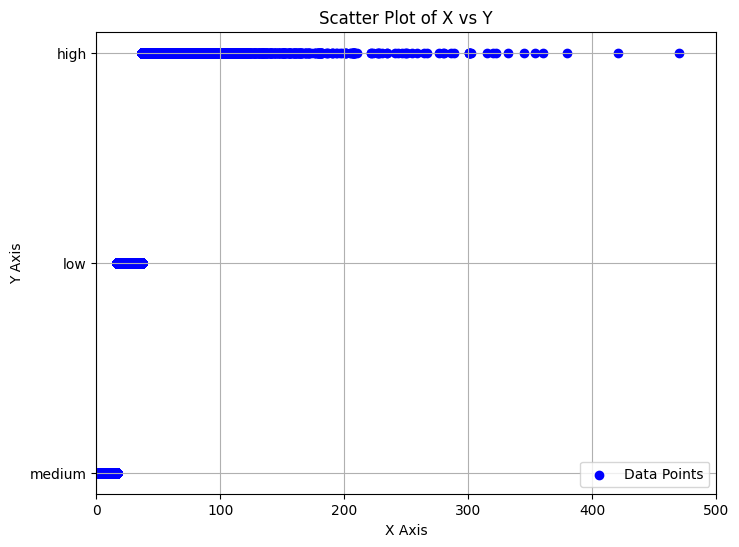

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(green_df['total_amount'], green_df['trip_price'], color='blue', label='Data Points')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Scatter Plot of X vs Y')
plt.legend()
plt.xlim(0, 500)
plt.grid(True)
plt.show()
#as assigning clusters to names is random so by plotting it is found that the cluster with the
#min values is assigned to mid and the one with mid values is assigned to low

In [ ]:
green_df['trip_price'] = green_df['trip_price'].replace({'low': 'medium', 'medium': 'low'})
#switching names between low and mid clusters

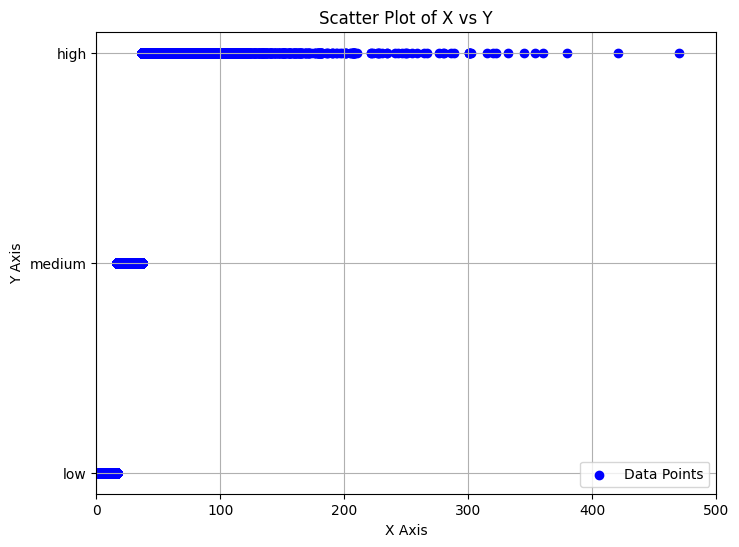

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(green_df['total_amount'], green_df['trip_price'], color='blue', label='Data Points')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Scatter Plot of X vs Y')
plt.legend()
plt.xlim(0, 500)
plt.grid(True)
plt.show()


the graph correctly shows low amouts in 'low' cluster, meduim amounts in 'med' cluster, ad high amounts in 'high' cluster.

In [ ]:
green_df.to_csv('/content/drive/My Drive/my_dataframe.csv', index=False)


In [ ]:

# Group by 'Category' and get the maximum value for each group
#max_values = green_df.groupby('high')['total_amount'].max()
max_min_values = green_df.groupby('trip_price')['total_amount'].agg(['max', 'min'])
max_min_values
#verifying cluster margins

,max,min
trip_price,,
high,1899.80,37.13
low,16.50,-4.80
medium,37.11,16.52


In [ ]:
count_occurrences = green_df['trip_price'].value_counts()
count_occurrences
#counting the occurence of each cluster

trip_price
low       661558
medium    216548
high       35111
Name: count, dtype: int64

In [ ]:
#trying clustering by frequency
green_df_sort = green_df.sort_values(by='total_amount')

value_counts = green_df_sort['total_amount'].value_counts()
green_df_freq = green_df.copy()

# Define bins based on frequency
low_cutoff = value_counts.quantile(1/3)
high_cutoff = value_counts.quantile(2/3)

# Function to map frequency to categories
def map_frequency_to_category(freq):
    if freq <= low_cutoff:
        return 'Low'
    elif freq <= high_cutoff:
        return 'Medium'
    else:
        return 'High'
green_df_freq['Frequency_Category'] = green_df_freq['total_amount'].map(value_counts).apply(map_frequency_to_category)


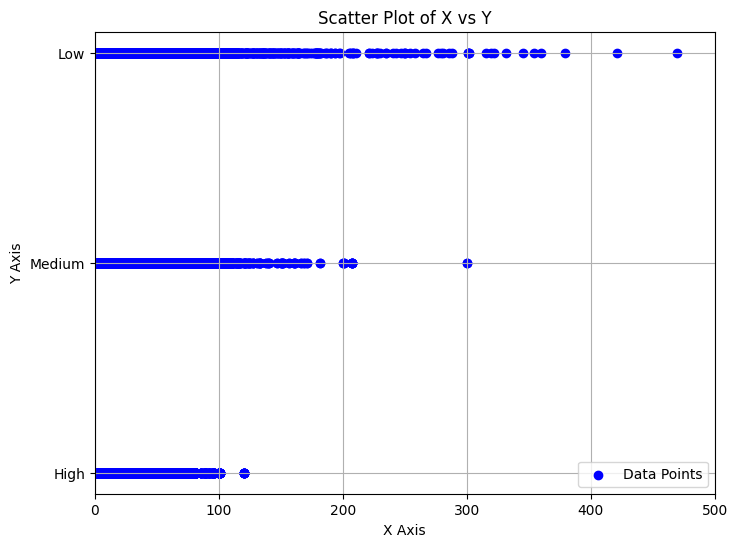

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(green_df_freq['total_amount'], green_df_freq['Frequency_Category'], color='blue', label='Data Points')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Scatter Plot of X vs Y')
plt.legend()
plt.xlim(0, 500)
plt.grid(True)
plt.show()


graph shows inaccurate results so kmeans was used as it yeilds better results

In [ ]:
green_taxi = green_df.copy()

In [ ]:
green_df.info

,lpep_pickup_datetime,lpep_dropoff_datetime,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,rate_type_Newark,rate_type_Standard rate,vendor_VeriFone Inc.,trip_type_Street-hail,refund_neg_duplicated_True,store_and_fwd_flag_Y,trip_duration_formatted,Frequency_Category,cluster,trip_price
0,2017-07-01 00:16:40,2017-07-01 00:17:02,225,220,1,0.00,2.5,0.5,999.0,0.00,...,0,1,1,1,0,0,00:00:22,High,1,low
1,2017-07-01 00:56:23,2017-07-01 00:59:30,43,43,1,0.81,4.5,0.5,0.5,0.00,...,0,1,1,1,0,0,00:03:07,High,1,low
2,2017-07-01 00:15:25,2017-07-01 00:34:24,79,61,1,4.97,18.0,0.5,0.5,3.86,...,0,1,1,1,0,0,00:18:59,High,0,medium
3,2017-07-01 00:55:06,2017-07-01 00:59:08,160,189,1,0.83,5.5,0.5,0.5,0.00,...,0,1,1,1,0,0,00:04:02,High,1,low
4,2017-07-01 00:34:05,2017-07-01 00:50:44,112,117,1,4.99,16.0,0.5,0.5,2.00,...,0,1,1,1,0,0,00:16:39,High,0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913212,2017-07-31 23:07:26,2017-07-31 23:17:21,37,164,1,1.39,8.0,0.5,0.5,0.00,...,0,1,1,1,0,0,00:09:55,High,1,low
913213,2017-07-31 23:24:52,2017-07-31 23:38:26,139,108,1,2.51,11.0,0.5,0.5,1.70,...,0,1,1,1,0,0,00:13:34,High,1,low
913214,2017-07-31 23:39:33,2017-07-31 23:45:40,105,138,1,1.00,6.5,0.5,0.5,0.00,...,0,1,1,1,0,0,00:06:07,High,1,low
913215,2017-07-31 23:19:22,2017-07-31 23:29:59,105,21,1,2.18,10.0,0.5,0.5,0.00,...,0,1,1,1,0,0,00:10:37,High,1,low


In [ ]:
import pandas as pd
from datetime import timedelta

#Converting trip duration from time formate to seconds to provide numerical input to machine learning models
# Function to convert time string to total minutes
def convert_to_minutes(time_str):
    hours, minutes, seconds = map(int, time_str.split(':'))
    time_obj = timedelta(hours=hours, minutes=minutes, seconds=seconds)
    return time_obj.total_seconds()

# Apply conversion function to DataFrame column
green_taxi['trip_duration'] = green_taxi['trip_duration_formatted'].apply(convert_to_minutes)

print(green_taxi)


       lpep_pickup_datetime lpep_dropoff_datetime  pu_location  do_location  \
0       2017-07-01 00:16:40   2017-07-01 00:17:02          225          220   
1       2017-07-01 00:56:23   2017-07-01 00:59:30           43           43   
2       2017-07-01 00:15:25   2017-07-01 00:34:24           79           61   
3       2017-07-01 00:55:06   2017-07-01 00:59:08          160          189   
4       2017-07-01 00:34:05   2017-07-01 00:50:44          112          117   
...                     ...                   ...          ...          ...   
913212  2017-07-31 23:07:26   2017-07-31 23:17:21           37          164   
913213  2017-07-31 23:24:52   2017-07-31 23:38:26          139          108   
913214  2017-07-31 23:39:33   2017-07-31 23:45:40          105          138   
913215  2017-07-31 23:19:22   2017-07-31 23:29:59          105           21   
913216  2017-07-30 05:32:22   2017-07-30 05:57:37          101          165   

        passenger_count  trip_distance  fare_amount

In [ ]:
# Convert DateTime column to datetime format
# converting date formate to month day as all inputs are days of july
green_taxi['lpep_pickup_datetime'] = pd.to_datetime(green_taxi['lpep_pickup_datetime'])

# Extract day and create a new column
green_taxi['Day'] = green_taxi['lpep_pickup_datetime'].dt.day


In [ ]:
#convert pickup time to int by rounding to neareast hour of the day[0,23]
# Round time to nearest hour
green_taxi['pickup_time'] = pd.to_timedelta(green_taxi['pickup_time'])

green_taxi['Time_Hours'] = green_taxi['pickup_time'].dt.round('H')

# Extract hour from rounded time
green_taxi['Hour'] = green_taxi['Time_Hours'].dt.components['hours']

In [ ]:
green_taxi.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913217 entries, 0 to 913216
Data columns (total 35 columns):
 #   Column                           Non-Null Count   Dtype          
---  ------                           --------------   -----          
 0   lpep_pickup_datetime             913217 non-null  datetime64[ns] 
 1   lpep_dropoff_datetime            913217 non-null  object         
 2   pu_location                      913217 non-null  int64          
 3   do_location                      913217 non-null  int64          
 4   passenger_count                  913217 non-null  int64          
 5   trip_distance                    913217 non-null  float64        
 6   fare_amount                      913217 non-null  float64        
 7   extra                            913217 non-null  float64        
 8   mta_tax                          913217 non-null  float64        
 9   tip_amount                       913217 non-null  float64        
 10  tolls_amount                    

In [ ]:
#droppig un-needed categorical columns and other columns that where formatted
green_taxi_new = green_taxi.drop(['Time_Hours','pickup_time','dropoff_time','date_range','total_amount', 'cluster', 'trip_duration_formatted','store_and_fwd_flag_Y','lpep_pickup_datetime','lpep_dropoff_datetime','vendor_VeriFone Inc.','Frequency_Category'], axis =1)

In [ ]:
#saving new dataset to use in models
green_taxi_new
green_taxi_new.to_csv('/content/drive/My Drive/ML_DF.csv', index=False)


In [ ]:
data_dir="/content/drive/MyDrive/ML_DF.csv"
ML= pd.read_csv(data_dir)
ML

,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,rate_type_Nassau or Westchester,rate_type_Negotiated fare,rate_type_Newark,rate_type_Standard rate,trip_type_Street-hail,refund_neg_duplicated_True,trip_price,trip_duration,Day,Hour
0,225,220,1,0.00,2.5,0.5,999.0,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,22.0,1,0
1,43,43,1,0.81,4.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,187.0,1,1
2,79,61,1,4.97,18.0,0.5,0.5,3.86,0.0,0.3,...,0,0,0,1,1,0,high,1139.0,1,0
3,160,189,1,0.83,5.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,242.0,1,1
4,112,117,1,4.99,16.0,0.5,0.5,2.00,0.0,0.3,...,0,0,0,1,1,0,high,999.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913212,37,164,1,1.39,8.0,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,595.0,31,23
913213,139,108,1,2.51,11.0,0.5,0.5,1.70,0.0,0.3,...,0,0,0,1,1,0,medium,814.0,31,23
913214,105,138,1,1.00,6.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,367.0,31,0
913215,105,21,1,2.18,10.0,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,637.0,31,23
